## 텍스트 생성

In [3]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

import urllib

In [5]:
# irish-lyrics-eof.txt 데이터셋 파일 다운로드 , Windows용
# url = 'https://github.com/aaBadri/nlp-tf/blob/master/irish-lyrics-eof.txt'
# urllib.request.urlretrieve(url, 'irish-lyrics-eof.txt')

('irish-lyrics-eof.txt', <http.client.HTTPMessage at 0x2bb348812d0>)

In [11]:
# 토큰화
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
# print(tokenizer.wor//d_index)
print(total_words)  # 2690

2690


In [16]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,
                                         padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)  # 원핫 인코딩

In [21]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 학습
history = model.fit(xs, ys, epochs=100, verbose=1)
print(model)

Epoch 1/100
377/377 [==============================] - 9s 10ms/step - loss: 6.6440 - accuracy: 0.0724
Epoch 2/100
377/377 [==============================] - 4s 10ms/step - loss: 5.7645 - accuracy: 0.1171
Epoch 3/100
377/377 [==============================] - 4s 9ms/step - loss: 4.8587 - accuracy: 0.1701
Epoch 4/100
377/377 [==============================] - 4s 10ms/step - loss: 3.8894 - accuracy: 0.2436
Epoch 5/100
377/377 [==============================] - 4s 10ms/step - loss: 2.9845 - accuracy: 0.3589
Epoch 6/100
377/377 [==============================] - 4s 10ms/step - loss: 2.2743 - accuracy: 0.4772
Epoch 7/100
377/377 [==============================] - 4s 10ms/step - loss: 1.7638 - accuracy: 0.5812
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 1.4437 - accuracy: 0.6556
Epoch 9/100
377/377 [==============================] - 4s 9ms/step - loss: 1.2051 - accuracy: 0.7117
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 1.0612 

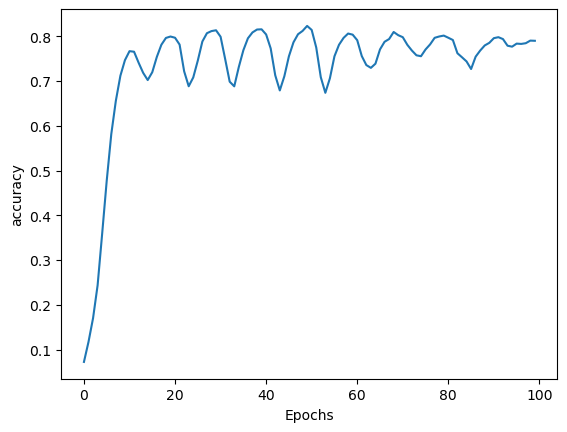

In [23]:
# 시각화
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [25]:
# 텍스트(문장) 생성
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = tf.argmax(model.predict(token_list, verbose=0),axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this into time and rain and heavy used to be here so gone you so beguiled gone you heard gone gone gone gone away mary gone gone gone she travel far far far far away oer the fair prince edward isle that began to gone and gone gone gone gone gone gone gone and gone all brave as ever would out to the clyde for the girl i lovd best love twould set i love your love letters gone gone gone alas from the tree to your love gone away gone and the contented eyes of green old gone gone and
